In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Fraud.csv')

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
df.duplicated().any()

False

In [7]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


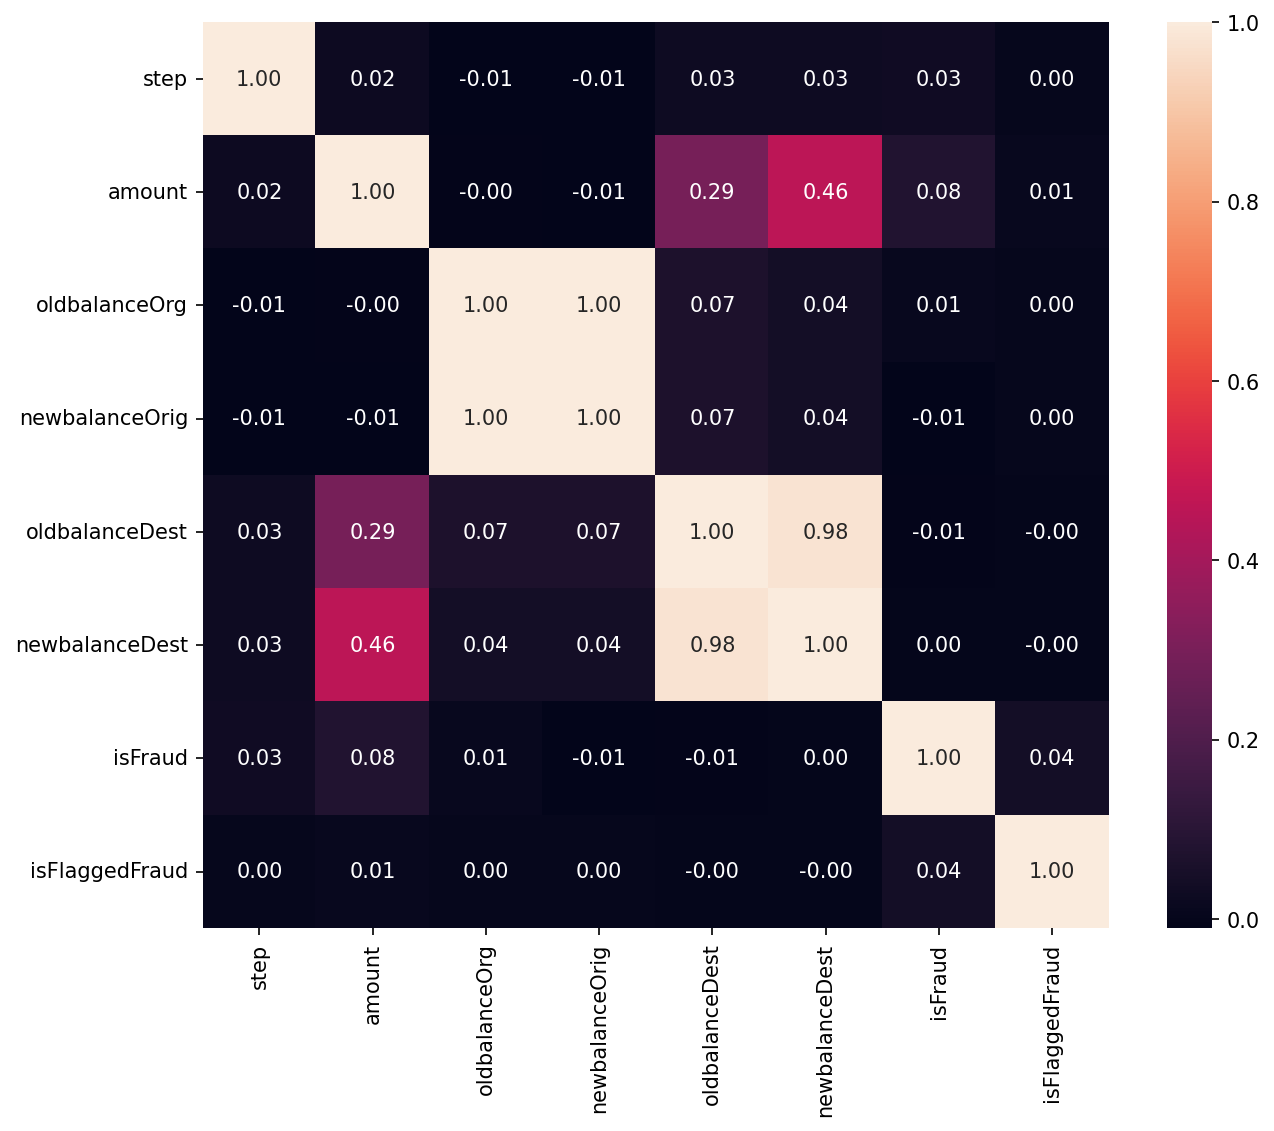

In [8]:
plt.figure(figsize=(10, 8), dpi=150)
sns.heatmap(df.corr(), annot=True, fmt='.2f', square=True)

In [9]:
df.drop('newbalanceDest', axis=1, inplace=True)

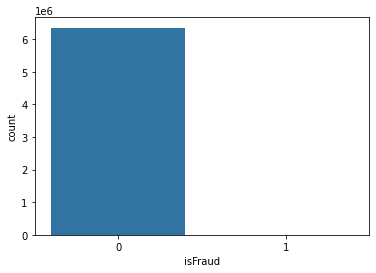

In [10]:
sns.countplot(data=df, x='isFraud')

In [11]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [12]:
for col in df.columns:
  print(col)
  print(df[col].value_counts().count())

step
743
type
5
amount
5316900
nameOrig
6353307
oldbalanceOrg
1845844
newbalanceOrig
2682586
nameDest
2722362
oldbalanceDest
3614697
isFraud
2
isFlaggedFraud
2


In [13]:
df.drop(['step', 'nameOrig', 'nameDest'], axis=1, inplace=True)

In [14]:
df.drop('newbalanceOrig', axis=1, inplace=True)

In [15]:
df.head()

,type,amount,oldbalanceOrg,oldbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,9839.64,170136.0,0.0,0,0
1,PAYMENT,1864.28,21249.0,0.0,0,0
2,TRANSFER,181.00,181.0,0.0,1,0
3,CASH_OUT,181.00,181.0,21182.0,1,0
4,PAYMENT,11668.14,41554.0,0.0,0,0


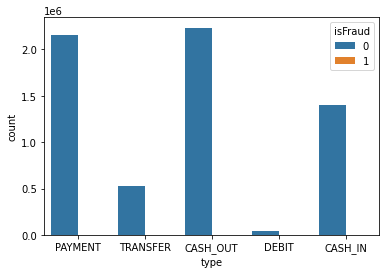

In [16]:
sns.countplot(data=df, x='type', hue='isFraud')

In [17]:
df.groupby('type')['isFraud'].value_counts()

type      isFraud
CASH_IN   0          1399284
CASH_OUT  0          2233384
          1             4116
DEBIT     0            41432
PAYMENT   0          2151495
TRANSFER  0           528812
          1             4097
Name: isFraud, dtype: int64

In [18]:
for ele in df.select_dtypes(include='number'):
  print(ele)
  print(df[ele].skew())

amount
30.99394948249038
oldbalanceOrg
5.249136420603121
oldbalanceDest
19.921757915791062
isFraud
27.779538153063452
isFlaggedFraud
630.6036294703543


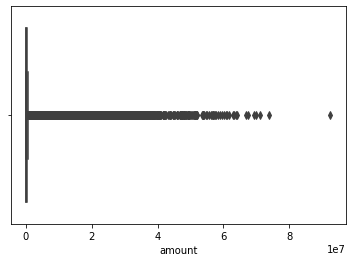

In [19]:
sns.boxplot(df['amount'])

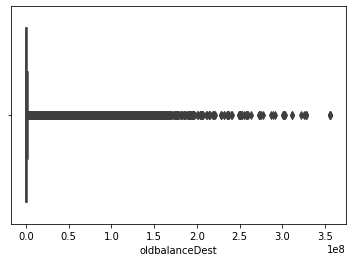

In [20]:
sns.boxplot(df['oldbalanceDest'])

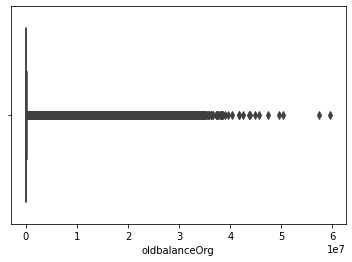

In [21]:
sns.boxplot(df['oldbalanceOrg'])

In [22]:
df.describe()

,amount,oldbalanceOrg,oldbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,1.798619e+05,8.338831e+05,1.100702e+06,1.290820e-03,2.514687e-06
std,6.038582e+05,2.888243e+06,3.399180e+06,3.590480e-02,1.585775e-03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.487194e+04,1.420800e+04,1.327057e+05,0.000000e+00,0.000000e+00
75%,2.087215e+05,1.073152e+05,9.430367e+05,0.000000e+00,0.000000e+00
max,9.244552e+07,5.958504e+07,3.560159e+08,1.000000e+00,1.000000e+00


In [23]:
def clip(col):
  col = col.clip(lower=col.quantile(0.25))
  col = col.clip(upper=col.quantile(0.75))
  return col

In [24]:
df['amount'] = clip(df['amount'])
df['oldbalanceOrg'] = clip(df['oldbalanceOrg'])
df['oldbalanceDest'] = clip(df['oldbalanceDest'])

In [25]:
df.describe()

,amount,oldbalanceOrg,oldbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,9.864931e+04,3.909623e+04,3.533474e+05,1.290820e-03,2.514687e-06
std,8.169388e+04,4.528129e+04,4.018975e+05,3.590480e-02,1.585775e-03
min,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.487194e+04,1.420800e+04,1.327057e+05,0.000000e+00,0.000000e+00
75%,2.087215e+05,1.073150e+05,9.430366e+05,0.000000e+00,0.000000e+00
max,2.087215e+05,1.073152e+05,9.430367e+05,1.000000e+00,1.000000e+00


In [26]:
for ele in df.select_dtypes(include='number'):
  print(ele)
  print(df[ele].skew())

amount
0.29147240798265117
oldbalanceOrg
0.647221339563144
oldbalanceDest
0.552999535401534
isFraud
27.779538153063452
isFlaggedFraud
630.6036294703543


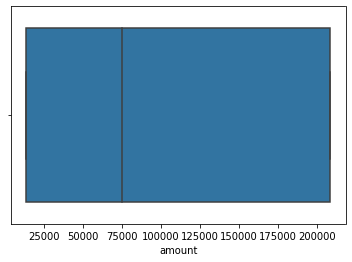

In [27]:
sns.boxplot(df['amount'])

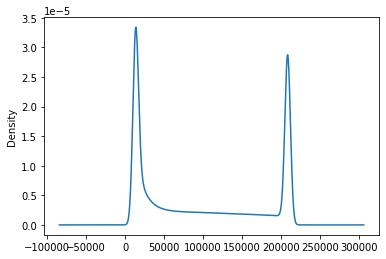

In [28]:
df['amount'].plot(kind='kde')

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV

In [30]:
from imblearn.under_sampling import RandomUnderSampler

In [31]:
sampling = RandomUnderSampler()

In [32]:
df = pd.get_dummies(df, drop_first=True)

In [33]:
X = df.drop('isFraud', axis=1)
y = df['isFraud']

In [34]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=101)

In [35]:
scaler = RobustScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [36]:
scaled_X_train, y_train = sampling.fit_resample(scaled_X_train, y_train)

In [37]:
len(scaled_X_train)

13172

In [38]:
model = LogisticRegression()

In [39]:
penalty = ['l1', 'l2', 'elasticnet', 'none']
l1_ratio = np.logspace(0, 10, 20)
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

In [40]:
param_grid = {'penalty': penalty, 'l1_ratio': l1_ratio, 'solver': solver}

In [41]:
grid = GridSearchCV(model, param_grid, scoring='accuracy', cv=5, verbose=1)

In [42]:
grid.fit(scaled_X_train, y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'l1_ratio': array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
       1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
       1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
       2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
       2.63665090e+08, 8.85866790e+08, 2.97635144e+09, 1.00000000e+10]),
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy', verbose=1)

In [43]:
grid.best_estimator_.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': 1.0,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'none',
 'random_state': None,
 'solver': 'newton-cg',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [44]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, classification_report, plot_roc_curve

In [45]:
pred = grid.predict(scaled_X_test)

In [46]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95   1270897
           1       0.01      0.96      0.03      1627

    accuracy                           0.91   1272524
   macro avg       0.51      0.94      0.49   1272524
weighted avg       1.00      0.91      0.95   1272524



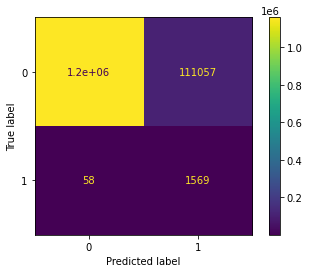

In [47]:
plot_confusion_matrix(grid, scaled_X_test, y_test)

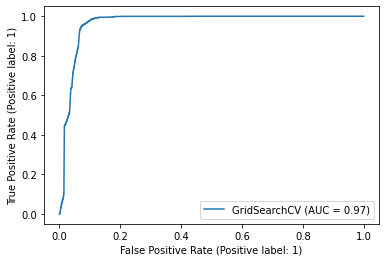

In [48]:
plot_roc_curve(grid, scaled_X_test, y_test)

In [49]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=101)

In [50]:
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [3, 4, 5], 
              'min_samples_split': [20, 25],
              'min_samples_leaf' : [30, 35, 40]
             }
tree_grid = GridSearchCV(dtree, cv=10, param_grid=param_grid, scoring='accuracy')
tree_grid.fit(scaled_X_train,y_train) 
print('Best Parameters using grid search: \n', tree_grid.best_params_)

Best Parameters using grid search: 
 {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 30, 'min_samples_split': 20}


In [54]:
dtree.set_params(criterion='entropy', max_depth=5, min_samples_leaf=30, min_samples_split=20)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=30,
                       min_samples_split=20, random_state=101)

In [56]:
dtree.fit(scaled_X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=30,
                       min_samples_split=20, random_state=101)

In [57]:
pred = dtree.predict(scaled_X_test)

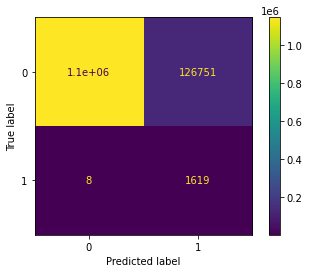

In [58]:
plot_confusion_matrix(dtree, scaled_X_test, y_test)

In [59]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95   1270897
           1       0.01      1.00      0.02      1627

    accuracy                           0.90   1272524
   macro avg       0.51      0.95      0.49   1272524
weighted avg       1.00      0.90      0.95   1272524



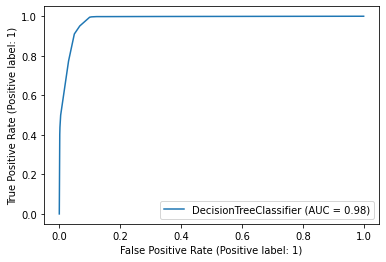

In [61]:
plot_roc_curve(dtree, scaled_X_test, y_test)

In [62]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

In [63]:
rforest = RandomForestClassifier(random_state=101, oob_score=True)

In [64]:
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [3, 4, 5], 
              'min_samples_split': [20, 25],
              'min_samples_leaf' : [30, 35, 40]
             }
rforest_grid = GridSearchCV(rforest, cv=10, param_grid=param_grid, scoring='accuracy')
rforest_grid.fit(scaled_X_train,y_train) 
print('Best Parameters using grid search: \n', rforest_grid.best_params_)

Best Parameters using grid search: 
 {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 35, 'min_samples_split': 20}


In [65]:
rforest.set_params(criterion = 'entropy',
                  min_samples_leaf = 35,
                  min_samples_split = 20,
                  max_depth = 5,
                  warm_start = True)

RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_leaf=35,
                       min_samples_split=20, oob_score=True, random_state=101,
                       warm_start=True)

In [69]:
min_estimators = 200
max_estimators = 1000

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    rforest.set_params(n_estimators=i)
    rforest.fit(scaled_X_train, y_train)

    oob_error = 1 - rforest.oob_score_
    error_rate[i] = oob_error

Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 200 to 1000 trees)')

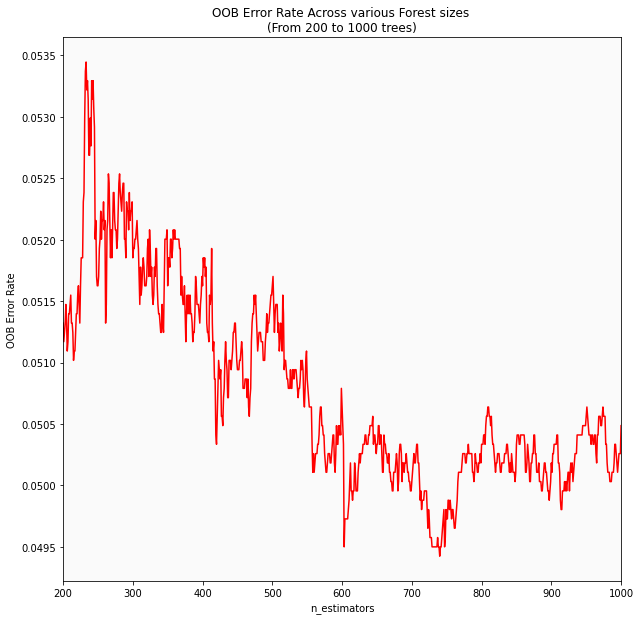

In [70]:
oob_series = pd.Series(error_rate)
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.xlim(200, 1000)
plt.title('OOB Error Rate Across various Forest sizes \n(From 200 to 1000 trees)')

In [71]:
rforest.set_params(n_estimators=650,
                  bootstrap = True,
                  warm_start=False, 
                  oob_score=False)

RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_leaf=35,
                       min_samples_split=20, n_estimators=650,
                       random_state=101)

In [72]:
rforest.fit(scaled_X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_leaf=35,
                       min_samples_split=20, n_estimators=650,
                       random_state=101)

In [74]:
rforest_pred = rforest.predict(scaled_X_test)

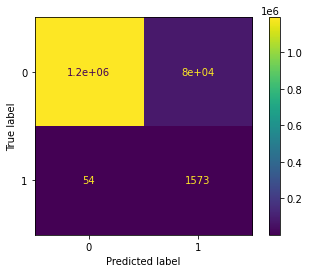

In [75]:
plot_confusion_matrix(rforest, scaled_X_test, y_test)

In [77]:
print(classification_report(y_test, rforest_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97   1270897
           1       0.02      0.97      0.04      1627

    accuracy                           0.94   1272524
   macro avg       0.51      0.95      0.50   1272524
weighted avg       1.00      0.94      0.97   1272524



In [78]:
import xgboost as xgb

In [79]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(scaled_X_train, y_train)

XGBClassifier(random_state=42)

In [80]:
pred = xgb_model.predict(scaled_X_test)

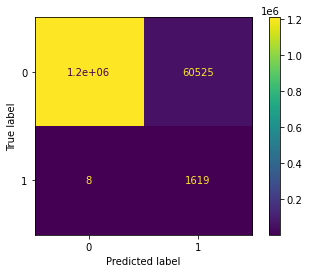

In [81]:
plot_confusion_matrix(xgb_model, scaled_X_test, y_test)

In [83]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98   1270897
           1       0.03      1.00      0.05      1627

    accuracy                           0.95   1272524
   macro avg       0.51      0.97      0.51   1272524
weighted avg       1.00      0.95      0.97   1272524

